In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
phys_supp_17 = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2017.txt", sep='\t', usecols=['npi', 'nppes_provider_last_org_name', 'nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'place_of_service', 'hcpcs_code', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt'], dtype={'npi': str, 'nppes_provider_last_org_name' : str, 'nppes_entity_code' : str, 'nppes_provider_zip' : str, 'nppes_provider_state' : str, 'provider_type' : str, 'place_of_service' : str, 'hcpcs_code' : str, 'bene_day_srvc_cnt' : float, 'average_Medicare_allowed_amt' : float})



In [3]:
phys_supp_16 = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2016.txt", sep='\t', usecols=['NPI','NPPES_PROVIDER_ZIP', 'PLACE_OF_SERVICE', 'HCPCS_CODE', 'BENE_DAY_SRVC_CNT', 'AVERAGE_MEDICARE_ALLOWED_AMT'], dtype={'NPI': str, 'NPPES_PROVIDER_ZIP' : str, 'PLACE_OF_SERVICE' : str, 'HCPCS_CODE' : str, 'BENE_DAY_SRVC_CNT' : float, 'AVERAGE_MEDICARE_ALLOWED_AMT' : float})



In [4]:
phys_supp_15 = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2015.txt", sep='\t', usecols=['npi', 'nppes_provider_zip', 'place_of_service', 'hcpcs_code', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt'], dtype={'npi': str, 'nppes_provider_zip' : str, 'place_of_service' : str, 'hcpcs_code' : str, 'bene_day_srvc_cnt' : float, 'average_Medicare_allowed_amt' : float})



In [5]:
zip_cbsa = pd.read_excel("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/ZIP_CBSA_032020.xlsx", usecols=['ZIP', 'CBSA'], dtype={'ZIP' : str, 'CBSA' : str})

In [6]:
phys_supp_17.columns = map(str.lower, phys_supp_17.columns)
phys_supp_16.columns = map(str.lower, phys_supp_16.columns)
phys_supp_15.columns = map(str.lower, phys_supp_15.columns)

In [7]:
phys_supp_17 = phys_supp_17.rename(columns={'bene_day_srvc_cnt' : 'srvc_cnt_17', 'average_medicare_allowed_amt' : 'avg_med_amt_17'})
phys_supp_16 = phys_supp_16.rename(columns={'bene_day_srvc_cnt' : 'srvc_cnt_16', 'average_medicare_allowed_amt' : 'avg_med_amt_16'})
phys_supp_15 = phys_supp_15.rename(columns={'bene_day_srvc_cnt' : 'srvc_cnt_15', 'average_medicare_allowed_amt' : 'avg_med_amt_15'})
print(phys_supp_17.info())
print(phys_supp_16.info())
print(phys_supp_15.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9847444 entries, 0 to 9847443
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   npi                           object 
 1   nppes_provider_last_org_name  object 
 2   nppes_entity_code             object 
 3   nppes_provider_zip            object 
 4   nppes_provider_state          object 
 5   provider_type                 object 
 6   place_of_service              object 
 7   hcpcs_code                    object 
 8   srvc_cnt_17                   float64
 9   avg_med_amt_17                float64
dtypes: float64(2), object(8)
memory usage: 751.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9714897 entries, 0 to 9714896
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   npi                 object 
 1   nppes_provider_zip  object 
 2   place_of_service    object 
 3   hcpcs_code          object 
 4

In [8]:
phys_join = pd.merge(phys_supp_17, phys_supp_16, how='inner', on=['npi', 'place_of_service' ,'hcpcs_code'])
print(phys_join.head())

          npi                       nppes_provider_last_org_name  \
0  0000000001  CPT copyright 2016 American Medical Associatio...   
1  1003000126                                          ENKESHAFI   
2  1003000126                                          ENKESHAFI   
3  1003000126                                          ENKESHAFI   
4  1003000126                                          ENKESHAFI   

  nppes_entity_code nppes_provider_zip_x nppes_provider_state  \
0               NaN                  NaN                  NaN   
1                 I            215021854                   MD   
2                 I            215021854                   MD   
3                 I            215021854                   MD   
4                 I            215021854                   MD   

       provider_type place_of_service hcpcs_code  srvc_cnt_17  avg_med_amt_17  \
0                NaN              NaN        NaN          NaN             NaN   
1  Internal Medicine                F 

In [9]:
phys_join = pd.merge(phys_join, phys_supp_15, how='inner', on=['npi', 'place_of_service' ,'hcpcs_code'])
phys_join = phys_join.drop(columns={'nppes_provider_zip_x', 'nppes_provider_zip_y'})
print(phys_join.head())

          npi                       nppes_provider_last_org_name  \
0  0000000001  CPT copyright 2016 American Medical Associatio...   
1  1003000126                                          ENKESHAFI   
2  1003000126                                          ENKESHAFI   
3  1003000126                                          ENKESHAFI   
4  1003000126                                          ENKESHAFI   

  nppes_entity_code nppes_provider_state      provider_type place_of_service  \
0               NaN                  NaN                NaN              NaN   
1                 I                   MD  Internal Medicine                F   
2                 I                   MD  Internal Medicine                F   
3                 I                   MD  Internal Medicine                F   
4                 I                   MD  Internal Medicine                F   

  hcpcs_code  srvc_cnt_17  avg_med_amt_17  srvc_cnt_16  avg_med_amt_16  \
0        NaN          NaN           

In [10]:
phys_join['ZIP'] = phys_join['nppes_provider_zip'].str[:5]

In [11]:
phys_join = pd.merge(phys_join, zip_cbsa, how='left', on='ZIP')

In [12]:
phys_join_med = phys_join.drop(columns={'nppes_provider_last_org_name', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'srvc_cnt_17', 'srvc_cnt_16', 'srvc_cnt_15'})
print(phys_join_med.info())
print(np.shape(phys_join_med))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842256 entries, 0 to 6842255
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   npi                object 
 1   nppes_entity_code  object 
 2   place_of_service   object 
 3   hcpcs_code         object 
 4   avg_med_amt_17     float64
 5   avg_med_amt_16     float64
 6   avg_med_amt_15     float64
 7   ZIP                object 
 8   CBSA               object 
dtypes: float64(3), object(6)
memory usage: 522.0+ MB
None
(6842256, 9)


In [13]:
phys_med_indv_O = phys_join_med[phys_join_med['nppes_entity_code'] == 'I']
print(np.shape(phys_med_indv_O))

(6497275, 9)


In [14]:
phys_med_indv_F = phys_med_indv_O[phys_med_indv_O['place_of_service'] == 'F']
print(np.shape(phys_med_indv_F))

(2531443, 9)


In [15]:
phys_med_indv_O = phys_med_indv_O[phys_med_indv_O['place_of_service'] == 'O']
print(np.shape(phys_med_indv_O))

(3965832, 9)


In [16]:
phys_med_org_O = phys_join_med[phys_join_med['nppes_entity_code'] == 'O']
print(np.shape(phys_med_org_O))

(344980, 9)


In [17]:
phys_med_org_F = phys_med_org_O[phys_med_org_O['place_of_service'] == 'F']
print(np.shape(phys_med_org_F))

(82129, 9)


In [18]:
phys_med_org_O = phys_med_org_O[phys_med_org_O['place_of_service'] == 'O']
print(np.shape(phys_med_org_O))

(262851, 9)


In [19]:
phys_med_io_group = phys_med_indv_O.groupby('hcpcs_code').mean()
phys_med_io_group = phys_med_io_group.reset_index()
print(phys_med_io_group)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0         00103      242.459405      225.736845      263.455662
1         00142       82.209689       83.102839       84.455969
2         00160      213.750445      215.261039      216.226974
3         00170      131.820746      126.353729      137.007402
4         00300      138.754830      141.416685      147.488827
...         ...             ...             ...             ...
3163      Q9967        0.123271        0.124421        0.152255
3164      Q9969        9.703697        9.743506       12.541174
3165      R0070      222.432805      220.546799      219.447497
3166      R0075       87.831579       91.664589       85.652551
3167      V2632      113.830000      113.040000      113.490000

[3168 rows x 4 columns]


In [20]:
phys_med_io_group['16/17_med_chng'] = abs(phys_med_io_group['avg_med_amt_17'] - phys_med_io_group['avg_med_amt_16'])
phys_med_io_group['15/16_med_chng'] = abs(phys_med_io_group['avg_med_amt_16'] - phys_med_io_group['avg_med_amt_15'])
phys_med_io_group['15/17_med_chng'] = abs(phys_med_io_group['avg_med_amt_17'] - phys_med_io_group['avg_med_amt_15'])

In [21]:
phys_med_io_1517 = phys_med_io_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_io_1517 = phys_med_io_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_io_1517)

     hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
3035      J7192    17895.679067    33345.018081    15449.339014
3120      Q2043    39255.403622    35877.310500     3378.093122
609       41530      946.850260     3105.401348     2158.551088
2861      J0600     1933.008855      225.866088     1707.142767
3092      J9999     1746.413318      465.466032     1280.947286


In [22]:
phys_med_io_top5 = phys_med_io_group[phys_med_io_group["hcpcs_code"].isin(['J7192', 'Q2043', '41530', 'J0600', 'J9999'])]
print(phys_med_io_top5)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
609       41530      946.850260      943.177983     3105.401348   
2861      J0600     1933.008855     1735.182012      225.866088   
3035      J7192    17895.679067      324.885624    33345.018081   
3092      J9999     1746.413318     1439.377377      465.466032   
3120      Q2043    39255.403622    37640.843298    35877.310500   

      16/17_med_chng  15/16_med_chng  15/17_med_chng  
609         3.672277     2162.223365     2158.551088  
2861      197.826843     1509.315924     1707.142767  
3035    17570.793443    33020.132458    15449.339014  
3092      307.035941      973.911345     1280.947286  
3120     1614.560324     1763.532799     3378.093122  


In [23]:
phys_med_if_group = phys_med_indv_F.groupby('hcpcs_code').mean()
phys_med_if_group = phys_med_if_group.reset_index()
print(phys_med_if_group)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0         00103      154.717654      152.094815      157.181461
1         00104       81.237561       80.954174       82.902766
2         00120      185.990211      187.184187      197.825921
3         00126       77.143073       77.420606       81.089396
4         00140      140.357408      140.017159      147.483015
...         ...             ...             ...             ...
3065      Q4110       66.587918       39.104372       37.115946
3066      Q9962        0.209927        0.200000        0.200000
3067      Q9965        0.832785        0.854934        0.986658
3068      Q9967        0.125239        0.124301        0.152614
3069      R0070      211.460000      209.370000      206.069041

[3070 rows x 4 columns]


In [24]:
phys_med_if_group['16/17_med_chng'] = abs(phys_med_if_group['avg_med_amt_17'] - phys_med_if_group['avg_med_amt_16'])
phys_med_if_group['15/16_med_chng'] = abs(phys_med_if_group['avg_med_amt_16'] - phys_med_if_group['avg_med_amt_15'])
phys_med_if_group['15/17_med_chng'] = abs(phys_med_if_group['avg_med_amt_17'] - phys_med_if_group['avg_med_amt_15'])

In [25]:
phys_med_if_1517 = phys_med_if_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_if_1517 = phys_med_if_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_if_1517)

     hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
1666      61592     1425.524706     2106.550741      681.026035
1920      67228      309.887455      959.525858      649.638404
1467      50820     1906.702727     1310.598636      596.104091
1503      51999     2171.255375     1631.389033      539.866342
848       31599     1031.115545      560.512778      470.602767


In [26]:
phys_med_if_top5 = phys_med_if_group[phys_med_if_group["hcpcs_code"].isin(['61592', '67228', '50820', '51999', '31599'])]
print(phys_med_if_top5)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
848       31599     1031.115545      580.396331      560.512778   
1467      50820     1906.702727     1792.720937     1310.598636   
1503      51999     2171.255375     1845.089073     1631.389033   
1666      61592     1425.524706     2044.420571     2106.550741   
1920      67228      309.887455      309.744853      959.525858   

      16/17_med_chng  15/16_med_chng  15/17_med_chng  
848       450.719214       19.883553      470.602767  
1467      113.981790      482.122301      596.104091  
1503      326.166302      213.700039      539.866342  
1666      618.895866       62.130169      681.026035  
1920        0.142601      649.781005      649.638404  


In [27]:
phys_med_oo_group = phys_med_org_O.groupby('hcpcs_code').mean()
phys_med_oo_group = phys_med_oo_group.reset_index()
print(phys_med_oo_group)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0         0159T       12.945800       13.104211       12.013852
1         0297T      335.272381      320.057977      315.872825
2         0379T       74.378447       74.229995       74.230000
3         10022      145.493419      145.813333      146.579176
4         19083      602.640000      596.460000      579.040909
...         ...             ...             ...             ...
1491      Q9965        0.823380        0.856529        0.971121
1492      Q9966        0.253390        0.174300        0.195898
1493      Q9967        0.127954        0.126395        0.152965
1494      R0070      179.270707      177.991836      177.270363
1495      R0075       76.831816       76.360005       75.941786

[1496 rows x 4 columns]


In [28]:
phys_med_oo_group['16/17_med_chng'] = abs(phys_med_oo_group['avg_med_amt_17'] - phys_med_oo_group['avg_med_amt_16'])
phys_med_oo_group['15/16_med_chng'] = abs(phys_med_oo_group['avg_med_amt_16'] - phys_med_oo_group['avg_med_amt_15'])
phys_med_oo_group['15/17_med_chng'] = abs(phys_med_oo_group['avg_med_amt_17'] - phys_med_oo_group['avg_med_amt_15'])

In [29]:
phys_med_oo_1517 = phys_med_oo_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_oo_1517 = phys_med_oo_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_oo_1517)

     hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
1444      J7187    42280.125522    23863.910069    18416.215453
1445      J7190        2.195144     7549.290722     7547.095578
1447      J7195    25003.926636    30536.542002     5532.615366
1446      J7192    17266.087675    19813.444168     2547.356493
253       77371     1772.950000      742.704444     1030.245556


In [30]:
phys_med_oo_top5 = phys_med_oo_group[phys_med_oo_group["hcpcs_code"].isin(['J7187', 'J7190', 'J7195', 'J7192', '77371'])]
print(phys_med_oo_top5)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
253       77371     1772.950000     1735.268750      742.704444   
1444      J7187    42280.125522    34201.918387    23863.910069   
1445      J7190        2.195144     5206.283813     7549.290722   
1446      J7192    17266.087675    21000.894385    19813.444168   
1447      J7195    25003.926636    29024.583734    30536.542002   

      16/17_med_chng  15/16_med_chng  15/17_med_chng  
253        37.681250      992.564306     1030.245556  
1444     8078.207135    10338.008318    18416.215453  
1445     5204.088669     2343.006909     7547.095578  
1446     3734.806709     1187.450217     2547.356493  
1447     4020.657099     1511.958268     5532.615366  


In [31]:
phys_med_of_group = phys_med_org_F.groupby('hcpcs_code').mean()
phys_med_of_group = phys_med_of_group.reset_index()
print(phys_med_of_group)

    hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0        0191T     2596.529464     1815.056496     1733.284501
1        10022      100.968646      100.540024      100.962067
2        11012      675.319333      567.479412      249.786667
3        11042      128.391999      105.670336      138.334541
4        11043      191.265589      188.126469      133.457044
..         ...             ...             ...             ...
991      Q0092       25.458637       25.485955       25.490223
992      Q2037       17.690000       16.280000       15.830000
993      R0070      182.340787      180.869384      180.268324
994      R0075       82.599440       81.751214       83.108256
995      V2785     3871.247952     3812.453578     3291.658953

[996 rows x 4 columns]


In [32]:
phys_med_of_group['16/17_med_chng'] = abs(phys_med_of_group['avg_med_amt_17'] - phys_med_of_group['avg_med_amt_16'])
phys_med_of_group['15/16_med_chng'] = abs(phys_med_of_group['avg_med_amt_16'] - phys_med_of_group['avg_med_amt_15'])
phys_med_of_group['15/17_med_chng'] = abs(phys_med_of_group['avg_med_amt_17'] - phys_med_of_group['avg_med_amt_15'])

In [33]:
phys_med_of_1517 = phys_med_of_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_of_1517 = phys_med_of_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_of_1517)

    hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
485      64575     9495.304583     4135.850000     5359.454583
220      28730     6780.870000     2507.134286     4273.735714
282      33264    24362.086026    28020.960000     3658.873974
632      69930    30720.781782    27903.864054     2816.917729
233      29825     1624.120000     3147.276410     1523.156410


In [34]:
phys_med_of_top5 = phys_med_of_group[phys_med_of_group["hcpcs_code"].isin(['64575', '28730', '33264', '69930', '29825'])]
print(phys_med_of_top5)

    hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
220      28730     6780.870000     3329.220000     2507.134286   
233      29825     1624.120000     1815.060000     3147.276410   
282      33264    24362.086026    26318.603125    28020.960000   
485      64575     9495.304583     4330.190000     4135.850000   
632      69930    30720.781782    29795.304200    27903.864054   

     16/17_med_chng  15/16_med_chng  15/17_med_chng  
220     3451.650000      822.085714     4273.735714  
233      190.940000     1332.216410     1523.156410  
282     1956.517100     1702.356875     3658.873974  
485     5165.114583      194.340000     5359.454583  
632      925.477582     1891.440146     2816.917729  


In [35]:
phys_join_srvc = phys_join.drop(columns={'nppes_provider_last_org_name', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'avg_med_amt_17', 'avg_med_amt_16', 'avg_med_amt_15'})
print(phys_join_srvc.info())
print(np.shape(phys_join_srvc))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842256 entries, 0 to 6842255
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   npi                object 
 1   nppes_entity_code  object 
 2   place_of_service   object 
 3   hcpcs_code         object 
 4   srvc_cnt_17        float64
 5   srvc_cnt_16        float64
 6   srvc_cnt_15        float64
 7   ZIP                object 
 8   CBSA               object 
dtypes: float64(3), object(6)
memory usage: 522.0+ MB
None
(6842256, 9)


In [36]:
phys_srvc_indv_O = phys_join_srvc[phys_join_srvc['nppes_entity_code'] == 'I']
print(np.shape(phys_srvc_indv_O))

(6497275, 9)


In [37]:
phys_srvc_indv_F = phys_srvc_indv_O[phys_srvc_indv_O['place_of_service'] == 'F']
print(np.shape(phys_srvc_indv_F))

(2531443, 9)


In [38]:
phys_srvc_indv_O = phys_srvc_indv_O[phys_srvc_indv_O['place_of_service'] == 'O']
print(np.shape(phys_srvc_indv_O))

(3965832, 9)


In [39]:
phys_srvc_org_O = phys_join_srvc[phys_join_srvc['nppes_entity_code'] == 'O']
print(np.shape(phys_srvc_org_O))

(344980, 9)


In [40]:
phys_srvc_org_F = phys_srvc_org_O[phys_srvc_org_O['place_of_service'] == 'F']
print(np.shape(phys_srvc_org_F))

(82129, 9)


In [41]:
phys_srvc_org_O = phys_srvc_org_O[phys_srvc_org_O['place_of_service'] == 'O']
print(np.shape(phys_srvc_org_O))

(262851, 9)


In [42]:
phys_srvc_io_group = phys_srvc_indv_O.groupby('hcpcs_code').sum()
phys_srvc_io_group = phys_srvc_io_group.reset_index()
print(phys_srvc_io_group)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0         00103         29.0         40.0         54.0
1         00142        823.0       1069.0        218.0
2         00160        118.0        134.0        182.0
3         00170        271.0        399.0        395.0
4         00300        756.0        669.0        367.0
...         ...          ...          ...          ...
3163      Q9967     968813.0    1032095.0     962653.0
3164      Q9969       2180.0       2175.0       1553.0
3165      R0070       3741.0       3469.0       3268.0
3166      R0075        497.0        374.0        428.0
3167      V2632         89.0         98.0        103.0

[3168 rows x 4 columns]


In [43]:
phys_srvc_io_group['16/17_srvc_chng'] = abs(phys_srvc_io_group['srvc_cnt_17'] - phys_srvc_io_group['srvc_cnt_16'])
phys_srvc_io_group['15/16_srvc_chng'] = abs(phys_srvc_io_group['srvc_cnt_16'] - phys_srvc_io_group['srvc_cnt_15'])
phys_srvc_io_group['15/17_srvc_chng'] = abs(phys_srvc_io_group['srvc_cnt_17'] - phys_srvc_io_group['srvc_cnt_15'])

In [44]:
phys_srvc_io_1517 = phys_srvc_io_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_io_1517 = phys_srvc_io_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_io_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
2636      99214   93946526.0   88251448.0        5695078.0
2135      90670    1065891.0    3081734.0        2015843.0
2729      G0009    2070585.0    3831076.0        1760491.0
2635      99213   91046163.0   92561066.0        1514903.0
2803      G0439    5442886.0    4089078.0        1353808.0


In [45]:
phys_srvc_io_top5 = phys_srvc_io_group[phys_srvc_io_group["hcpcs_code"].isin(['99214', '90670', 'G0009', '99213', 'G0439'])]
print(phys_srvc_io_top5)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
2135      90670    1065891.0    1888401.0    3081734.0         822510.0   
2635      99213   91046163.0   95594961.0   92561066.0        4548798.0   
2636      99214   93946526.0   95071541.0   88251448.0        1125015.0   
2729      G0009    2070585.0    2774033.0    3831076.0         703448.0   
2803      G0439    5442886.0    4943145.0    4089078.0         499741.0   

      15/16_srvc_chng  15/17_srvc_chng  
2135        1193333.0        2015843.0  
2635        3033895.0        1514903.0  
2636        6820093.0        5695078.0  
2729        1057043.0        1760491.0  
2803         854067.0        1353808.0  


In [46]:
phys_srvc_if_group = phys_srvc_indv_F.groupby('hcpcs_code').sum()
phys_srvc_if_group = phys_srvc_if_group.reset_index()
print(phys_srvc_if_group)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0         00103      47067.0      49645.0      47545.0
1         00104      84934.0      93741.0      92635.0
2         00120       1374.0       1508.0       1352.0
3         00126        247.0        256.0        249.0
4         00140      73286.0      75607.0      67682.0
...         ...          ...          ...          ...
3065      Q4110         86.0         67.0         70.0
3066      Q9962        412.0        332.0        297.0
3067      Q9965        292.0        290.0        380.0
3068      Q9967        209.0        301.0        237.0
3069      R0070        120.0         94.0         73.0

[3070 rows x 4 columns]


In [47]:
phys_srvc_if_group['16/17_srvc_chng'] = abs(phys_srvc_if_group['srvc_cnt_17'] - phys_srvc_if_group['srvc_cnt_16'])
phys_srvc_if_group['15/16_srvc_chng'] = abs(phys_srvc_if_group['srvc_cnt_16'] - phys_srvc_if_group['srvc_cnt_15'])
phys_srvc_if_group['15/17_srvc_chng'] = abs(phys_srvc_if_group['srvc_cnt_17'] - phys_srvc_if_group['srvc_cnt_15'])

In [48]:
phys_srvc_if_1517 = phys_srvc_if_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_if_1517 = phys_srvc_if_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_if_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
2946      99232   42815070.0   45516102.0        2701032.0
2945      99231    5769872.0    6632663.0         862791.0
2056      71020    8003711.0    8767182.0         763471.0
2054      71010   15621331.0   16243571.0         622240.0
2941      99223    9383693.0    9899220.0         515527.0


In [49]:
phys_srvc_if_top5 = phys_srvc_if_group[phys_srvc_if_group["hcpcs_code"].isin(['99232', '99231', '71020', '71010', '99223'])]
print(phys_srvc_if_top5)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
2054      71010   15621331.0   16313024.0   16243571.0         691693.0   
2056      71020    8003711.0    8453529.0    8767182.0         449818.0   
2941      99223    9383693.0    9997169.0    9899220.0         613476.0   
2945      99231    5769872.0    6534493.0    6632663.0         764621.0   
2946      99232   42815070.0   45812633.0   45516102.0        2997563.0   

      15/16_srvc_chng  15/17_srvc_chng  
2054          69453.0         622240.0  
2056         313653.0         763471.0  
2941          97949.0         515527.0  
2945          98170.0         862791.0  
2946         296531.0        2701032.0  


In [50]:
phys_srvc_oo_group = phys_srvc_org_O.groupby('hcpcs_code').sum()
phys_srvc_oo_group = phys_srvc_oo_group.reset_index()
print(phys_srvc_oo_group)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0         0159T        482.0        524.0        452.0
1         0297T      96380.0      65881.0      36186.0
2         0379T      33752.0      14651.0        415.0
3         10022        470.0        400.0        399.0
4         19083         14.0         19.0         22.0
...         ...          ...          ...          ...
1491      Q9965        463.0        698.0        714.0
1492      Q9966       2772.0       2667.0       2723.0
1493      Q9967     105811.0     101279.0      93400.0
1494      R0070     983648.0     999000.0    1016891.0
1495      R0075     454600.0     434686.0     445609.0

[1496 rows x 4 columns]


In [51]:
phys_srvc_oo_group['16/17_srvc_chng'] = abs(phys_srvc_oo_group['srvc_cnt_17'] - phys_srvc_oo_group['srvc_cnt_16'])
phys_srvc_oo_group['15/16_srvc_chng'] = abs(phys_srvc_oo_group['srvc_cnt_16'] - phys_srvc_oo_group['srvc_cnt_15'])
phys_srvc_oo_group['15/17_srvc_chng'] = abs(phys_srvc_oo_group['srvc_cnt_17'] - phys_srvc_oo_group['srvc_cnt_15'])

In [52]:
phys_srvc_oo_1517 = phys_srvc_oo_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_oo_1517 = phys_srvc_oo_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_oo_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
789       85610    5476487.0    6842974.0        1366487.0
731       85025   20295417.0   19369083.0         926334.0
561       83036   10751257.0    9855267.0         895990.0
1384      G0008    7548685.0    6657914.0         890771.0
291       80053   23506436.0   22661369.0         845067.0


In [53]:
phys_srvc_oo_top5 = phys_srvc_oo_group[phys_srvc_oo_group["hcpcs_code"].isin(['85610', '85025', '83036', 'G0008', '80053'])]
print(phys_srvc_oo_top5)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
291       80053   23506436.0   23564980.0   22661369.0          58544.0   
561       83036   10751257.0   10501332.0    9855267.0         249925.0   
731       85025   20295417.0   20247232.0   19369083.0          48185.0   
789       85610    5476487.0    6248387.0    6842974.0         771900.0   
1384      G0008    7548685.0    6743827.0    6657914.0         804858.0   

      15/16_srvc_chng  15/17_srvc_chng  
291          903611.0         845067.0  
561          646065.0         895990.0  
731          878149.0         926334.0  
789          594587.0        1366487.0  
1384          85913.0         890771.0  


In [54]:
phys_srvc_of_group = phys_srvc_org_F.groupby('hcpcs_code').sum()
phys_srvc_of_group = phys_srvc_of_group.reset_index()
print(phys_srvc_of_group)

    hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0        0191T      24870.0      25427.0      19818.0
1        10022        131.0        118.0        102.0
2        11012         14.0         15.0         16.0
3        11042      12413.0       6353.0       3445.0
4        11043       1149.0       6321.0       1128.0
..         ...          ...          ...          ...
991      Q0092      44286.0      51052.0      43208.0
992      Q2037         35.0         45.0        229.0
993      R0070      30839.0      35751.0      31699.0
994      R0075      13467.0      13997.0      10801.0
995      V2785       7848.0       8149.0       9232.0

[996 rows x 4 columns]


In [55]:
phys_srvc_of_group['16/17_srvc_chng'] = abs(phys_srvc_of_group['srvc_cnt_17'] - phys_srvc_of_group['srvc_cnt_16'])
phys_srvc_of_group['15/16_srvc_chng'] = abs(phys_srvc_of_group['srvc_cnt_16'] - phys_srvc_of_group['srvc_cnt_15'])
phys_srvc_of_group['15/17_srvc_chng'] = abs(phys_srvc_of_group['srvc_cnt_17'] - phys_srvc_of_group['srvc_cnt_15'])

In [56]:
phys_srvc_of_1517 = phys_srvc_of_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_of_1517 = phys_srvc_of_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_of_1517)

    hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
949      A0428    4125995.0    4349497.0         223502.0
977      G0471    3175479.0    2979164.0         196315.0
836      85610      30861.0     144353.0         113492.0
989      P9603    1381163.0    1466905.0          85742.0
948      A0427    5602953.0    5519115.0          83838.0


In [57]:
phys_srvc_of_top5 = phys_srvc_of_group[phys_srvc_of_group["hcpcs_code"].isin(['A0428', 'G0471', '85610', 'P9603', 'A0427'])]
print(phys_srvc_of_top5)

    hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
836      85610      30861.0      94170.0     144353.0          63309.0   
948      A0427    5602953.0    5573065.0    5519115.0          29888.0   
949      A0428    4125995.0    4254642.0    4349497.0         128647.0   
977      G0471    3175479.0    3106023.0    2979164.0          69456.0   
989      P9603    1381163.0    1453607.0    1466905.0          72444.0   

     15/16_srvc_chng  15/17_srvc_chng  
836          50183.0         113492.0  
948          53950.0          83838.0  
949          94855.0         223502.0  
977         126859.0         196315.0  
989          13298.0          85742.0  


In [58]:
print(phys_med_io_top5)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
609       41530      946.850260      943.177983     3105.401348   
2861      J0600     1933.008855     1735.182012      225.866088   
3035      J7192    17895.679067      324.885624    33345.018081   
3092      J9999     1746.413318     1439.377377      465.466032   
3120      Q2043    39255.403622    37640.843298    35877.310500   

      16/17_med_chng  15/16_med_chng  15/17_med_chng  
609         3.672277     2162.223365     2158.551088  
2861      197.826843     1509.315924     1707.142767  
3035    17570.793443    33020.132458    15449.339014  
3092      307.035941      973.911345     1280.947286  
3120     1614.560324     1763.532799     3378.093122  


In [59]:
phys_supp_17['ZIP'] = phys_supp_17['nppes_provider_zip'].str[:5]

In [60]:
phys_zip_17 = pd.merge(phys_supp_17, zip_cbsa, how='left', on='ZIP')

In [61]:
phys_zip_17 = phys_zip_17.drop(columns={'npi', 'nppes_provider_last_org_name', 'nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'place_of_service', 'CBSA'})

In [62]:
phys_17_group = phys_zip_17.groupby('hcpcs_code').mean()
phys_17_group = phys_17_group.reset_index()
print(phys_17_group)

     hcpcs_code  srvc_cnt_17  avg_med_amt_17
0         0008M    45.800000     3443.360000
1         00100    12.250000      279.764101
2         00103    29.379651      150.285108
3         00104    46.344046       81.635614
4         00120    22.214286      191.618064
...         ...          ...             ...
6043      Q9989    16.000000       12.878341
6044      R0070  2792.685484      179.225073
6045      R0075  1813.689139       77.755564
6046      V2632    89.000000      113.830000
6047      V2785    40.196507     3840.269851

[6048 rows x 3 columns]


In [63]:
phys_17_medio_top5 = phys_17_group[phys_17_group["hcpcs_code"].isin(['41530', 'J0600', 'J7192', 'J9999', 'Q2043'])]
phys_17_medio_top5 = phys_17_medio_top5.reset_index()
phys_17_medio_top5['year'] = 2017
phys_17_medio_top5 = phys_17_medio_top5.drop(columns={'srvc_cnt_17', 'index'})
phys_17_medio_top5 = phys_17_medio_top5.rename(columns={'avg_med_amt_17' : 'average_medicare_allowed_amt'})
print(phys_17_medio_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      41530                    875.926198  2017
1      J0600                   2354.875647  2017
2      J7192                  12880.678381  2017
3      J9999                   1241.578519  2017
4      Q2043                  39279.086545  2017


In [64]:
phys_supp_16['ZIP'] = phys_supp_16['nppes_provider_zip'].str[:5]

In [65]:
phys_supp_16 = pd.merge(phys_supp_16, zip_cbsa, how='left', on='ZIP')

In [66]:
phys_supp_16 = phys_supp_16.drop(columns={'npi', 'nppes_provider_zip', 'place_of_service'})

In [67]:
phys_16_group = phys_supp_16.groupby('hcpcs_code').mean()
phys_16_group = phys_16_group.reset_index()
print(phys_16_group)

     hcpcs_code   srvc_cnt_16  avg_med_amt_16
0         0008M     65.666667     3419.419776
1         00100     12.333333      290.975942
2         00103     28.995647      148.848422
3         00104     47.340542       81.226855
4         0010M  13453.000000      333.559722
...         ...           ...             ...
6017      Q9983     26.571429     2632.567331
6018      R0070   2674.819095      179.152107
6019      R0075   1711.455556       77.560227
6020      V2632     98.000000      113.040000
6021      V2785     37.155378     3774.329022

[6022 rows x 3 columns]


In [68]:
phys_16_medio_top5 = phys_16_group[phys_16_group["hcpcs_code"].isin(['41530', 'J0600', 'J7192', 'J9999', 'Q2043'])]
phys_16_medio_top5 = phys_16_medio_top5.reset_index()
phys_16_medio_top5['year'] = 2016
phys_16_medio_top5 = phys_16_medio_top5.drop(columns={'srvc_cnt_16', 'index'})
phys_16_medio_top5 = phys_16_medio_top5.rename(columns={'avg_med_amt_16' : 'average_medicare_allowed_amt'})
print(phys_16_medio_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      41530                    893.447110  2016
1      J0600                   1039.718002  2016
2      J7192                  19275.296602  2016
3      J9999                   1737.626059  2016
4      Q2043                  37672.456856  2016


In [69]:
phys_supp_15['ZIP'] = phys_supp_15['nppes_provider_zip'].str[:5]

In [70]:
phys_supp_15 = pd.merge(phys_supp_15, zip_cbsa, how='left', on='ZIP')

In [71]:
phys_supp_15 = phys_supp_15.drop(columns={'npi', 'nppes_provider_zip', 'place_of_service'})

In [72]:
phys_15_group = phys_supp_15.groupby('hcpcs_code').mean()
phys_15_group = phys_15_group.reset_index()
print(phys_15_group)

     hcpcs_code  srvc_cnt_15  avg_med_amt_15
0         00100    15.000000      266.582807
1         00102    26.000000       95.198939
2         00103    29.361905      154.333417
3         00104    48.227996       83.078735
4         00120    22.018182      203.457393
...         ...          ...             ...
5978      Q9979    55.333333     1725.411777
5979      R0070  2732.017241      179.336948
5980      R0075  1807.130597       76.752054
5981      V2632   103.000000      113.490000
5982      V2785    39.342960     3122.129476

[5983 rows x 3 columns]


In [73]:
phys_15_medio_top5 = phys_15_group[phys_15_group["hcpcs_code"].isin(['41530', 'J0600', 'J7192', 'J9999', 'Q2043'])]
phys_15_medio_top5 = phys_15_medio_top5.reset_index()
phys_15_medio_top5['year'] = 2015
phys_15_medio_top5 = phys_15_medio_top5.drop(columns={'srvc_cnt_15', 'index'})
phys_15_medio_top5 = phys_15_medio_top5.rename(columns={'avg_med_amt_15' : 'average_medicare_allowed_amt'})
print(phys_15_medio_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      41530                   2988.085332  2015
1      J0600                    473.686663  2015
2      J7192                  18652.902051  2015
3      J9999                   2708.152776  2015
4      Q2043                  35938.558603  2015


In [74]:
phys_medio_top5 = pd.concat([phys_17_medio_top5, phys_16_medio_top5, phys_15_medio_top5], ignore_index=True)
print(phys_medio_top5)

   hcpcs_code  average_medicare_allowed_amt  year
0       41530                    875.926198  2017
1       J0600                   2354.875647  2017
2       J7192                  12880.678381  2017
3       J9999                   1241.578519  2017
4       Q2043                  39279.086545  2017
5       41530                    893.447110  2016
6       J0600                   1039.718002  2016
7       J7192                  19275.296602  2016
8       J9999                   1737.626059  2016
9       Q2043                  37672.456856  2016
10      41530                   2988.085332  2015
11      J0600                    473.686663  2015
12      J7192                  18652.902051  2015
13      J9999                   2708.152776  2015
14      Q2043                  35938.558603  2015


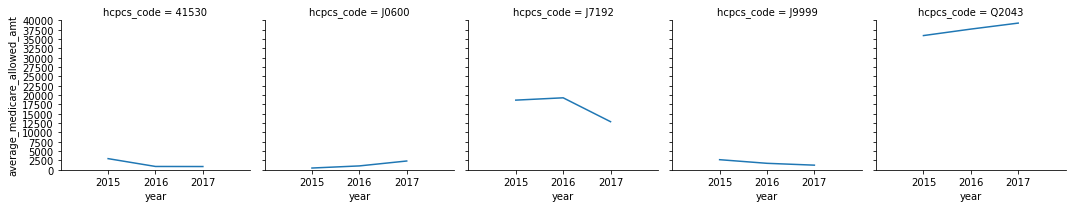

In [75]:
import seaborn as sns
g = sns.FacetGrid(phys_medio_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 40000), xticks=[2015, 2016, 2017], yticks=[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000])
g = g.map(plt.plot, "year", "average_medicare_allowed_amt")

In [76]:
print(phys_med_if_top5)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
848       31599     1031.115545      580.396331      560.512778   
1467      50820     1906.702727     1792.720937     1310.598636   
1503      51999     2171.255375     1845.089073     1631.389033   
1666      61592     1425.524706     2044.420571     2106.550741   
1920      67228      309.887455      309.744853      959.525858   

      16/17_med_chng  15/16_med_chng  15/17_med_chng  
848       450.719214       19.883553      470.602767  
1467      113.981790      482.122301      596.104091  
1503      326.166302      213.700039      539.866342  
1666      618.895866       62.130169      681.026035  
1920        0.142601      649.781005      649.638404  


In [77]:
phys_17_medif_top5 = phys_17_group[phys_17_group["hcpcs_code"].isin(['31599', '50820', '51999', '61592', '67228'])]
phys_17_medif_top5 = phys_17_medif_top5.reset_index()
phys_17_medif_top5['year'] = 2017
phys_17_medif_top5 = phys_17_medif_top5.drop(columns={'srvc_cnt_17', 'index'})
phys_17_medif_top5 = phys_17_medif_top5.rename(columns={'avg_med_amt_17' : 'average_medicare_allowed_amt'})
print(phys_17_medif_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      31599                   1031.115545  2017
1      50820                   1374.406177  2017
2      51999                   1806.836264  2017
3      61592                   1828.745270  2017
4      67228                    331.506730  2017


In [78]:
phys_16_medif_top5 = phys_16_group[phys_16_group["hcpcs_code"].isin(['31599', '50820', '51999', '61592', '67228'])]
phys_16_medif_top5 = phys_16_medif_top5.reset_index()
phys_16_medif_top5['year'] = 2016
phys_16_medif_top5 = phys_16_medif_top5.drop(columns={'srvc_cnt_16', 'index'})
phys_16_medif_top5 = phys_16_medif_top5.rename(columns={'avg_med_amt_16' : 'average_medicare_allowed_amt'})
print(phys_16_medif_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      31599                    370.481654  2016
1      50820                   1696.669716  2016
2      51999                   1771.621782  2016
3      61592                   1138.120286  2016
4      67228                    329.305534  2016


In [79]:
phys_15_medif_top5 = phys_15_group[phys_15_group["hcpcs_code"].isin(['31599', '50820', '51999', '61592', '67228'])]
phys_15_medif_top5 = phys_15_medif_top5.reset_index()
phys_15_medif_top5['year'] = 2015
phys_15_medif_top5 = phys_15_medif_top5.drop(columns={'srvc_cnt_15', 'index'})
phys_15_medif_top5 = phys_15_medif_top5.rename(columns={'avg_med_amt_15' : 'average_medicare_allowed_amt'})
print(phys_15_medif_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      31599                    436.483986  2015
1      50820                   1286.294388  2015
2      51999                   1455.293918  2015
3      61592                   2104.822643  2015
4      67228                    959.330722  2015


In [80]:
phys_medif_top5 = pd.concat([phys_17_medif_top5, phys_16_medif_top5, phys_15_medif_top5], ignore_index=True)
print(phys_medif_top5)

   hcpcs_code  average_medicare_allowed_amt  year
0       31599                   1031.115545  2017
1       50820                   1374.406177  2017
2       51999                   1806.836264  2017
3       61592                   1828.745270  2017
4       67228                    331.506730  2017
5       31599                    370.481654  2016
6       50820                   1696.669716  2016
7       51999                   1771.621782  2016
8       61592                   1138.120286  2016
9       67228                    329.305534  2016
10      31599                    436.483986  2015
11      50820                   1286.294388  2015
12      51999                   1455.293918  2015
13      61592                   2104.822643  2015
14      67228                    959.330722  2015


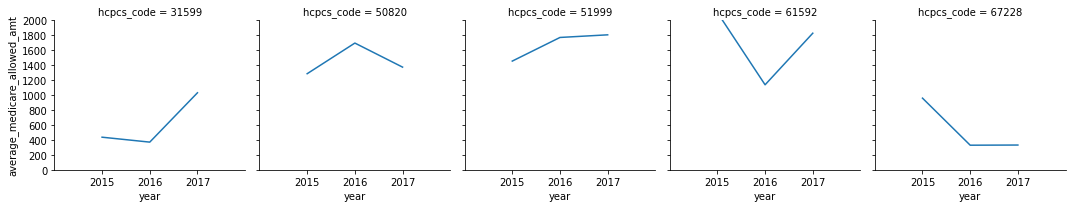

In [81]:
g = sns.FacetGrid(phys_medif_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 2000), xticks=[2015, 2016, 2017], yticks=[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
g = g.map(plt.plot, "year", "average_medicare_allowed_amt")

In [82]:
print(phys_med_oo_top5)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
253       77371     1772.950000     1735.268750      742.704444   
1444      J7187    42280.125522    34201.918387    23863.910069   
1445      J7190        2.195144     5206.283813     7549.290722   
1446      J7192    17266.087675    21000.894385    19813.444168   
1447      J7195    25003.926636    29024.583734    30536.542002   

      16/17_med_chng  15/16_med_chng  15/17_med_chng  
253        37.681250      992.564306     1030.245556  
1444     8078.207135    10338.008318    18416.215453  
1445     5204.088669     2343.006909     7547.095578  
1446     3734.806709     1187.450217     2547.356493  
1447     4020.657099     1511.958268     5532.615366  


In [83]:
phys_17_medoo_top5 = phys_17_group[phys_17_group["hcpcs_code"].isin(['77371', 'J7187', 'J7190', 'J7192', 'J7195'])]
phys_17_medoo_top5 = phys_17_medoo_top5.reset_index()
phys_17_medoo_top5['year'] = 2017
phys_17_medoo_top5 = phys_17_medoo_top5.drop(columns={'srvc_cnt_17', 'index'})
phys_17_medoo_top5 = phys_17_medoo_top5.rename(columns={'avg_med_amt_17' : 'average_medicare_allowed_amt'})
print(phys_17_medoo_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      77371                   2052.875000  2017
1      J7187                  27738.835016  2017
2      J7190                      2.195144  2017
3      J7192                  12880.678381  2017
4      J7195                  31261.043571  2017


In [84]:
phys_16_medoo_top5 = phys_16_group[phys_16_group["hcpcs_code"].isin(['77371', 'J7187', 'J7190', 'J7192', 'J7195'])]
phys_16_medoo_top5 = phys_16_medoo_top5.reset_index()
phys_16_medoo_top5['year'] = 2016
phys_16_medoo_top5 = phys_16_medoo_top5.drop(columns={'srvc_cnt_16', 'index'})
phys_16_medoo_top5 = phys_16_medoo_top5.rename(columns={'avg_med_amt_16' : 'average_medicare_allowed_amt'})
print(phys_16_medoo_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      77371                   1957.069375  2016
1      J7187                  34201.918387  2016
2      J7190                  16333.239106  2016
3      J7192                  19275.296602  2016
4      J7195                  29024.583734  2016


In [85]:
phys_15_medoo_top5 = phys_15_group[phys_15_group["hcpcs_code"].isin(['77371', 'J7187', 'J7190', 'J7192', 'J7195'])]
phys_15_medoo_top5 = phys_15_medoo_top5.reset_index()
phys_15_medoo_top5['year'] = 2015
phys_15_medoo_top5 = phys_15_medoo_top5.drop(columns={'srvc_cnt_15', 'index'})
phys_15_medoo_top5 = phys_15_medoo_top5.rename(columns={'avg_med_amt_15' : 'average_medicare_allowed_amt'})
print(phys_15_medoo_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      77371                   1792.280322  2015
1      J7187                  23863.910069  2015
2      J7190                  16275.470678  2015
3      J7192                  18652.902051  2015
4      J7195                  30536.542002  2015


In [86]:
phys_medoo_top5 = pd.concat([phys_17_medoo_top5, phys_16_medoo_top5, phys_15_medoo_top5], ignore_index=True)
print(phys_medoo_top5)

   hcpcs_code  average_medicare_allowed_amt  year
0       77371                   2052.875000  2017
1       J7187                  27738.835016  2017
2       J7190                      2.195144  2017
3       J7192                  12880.678381  2017
4       J7195                  31261.043571  2017
5       77371                   1957.069375  2016
6       J7187                  34201.918387  2016
7       J7190                  16333.239106  2016
8       J7192                  19275.296602  2016
9       J7195                  29024.583734  2016
10      77371                   1792.280322  2015
11      J7187                  23863.910069  2015
12      J7190                  16275.470678  2015
13      J7192                  18652.902051  2015
14      J7195                  30536.542002  2015


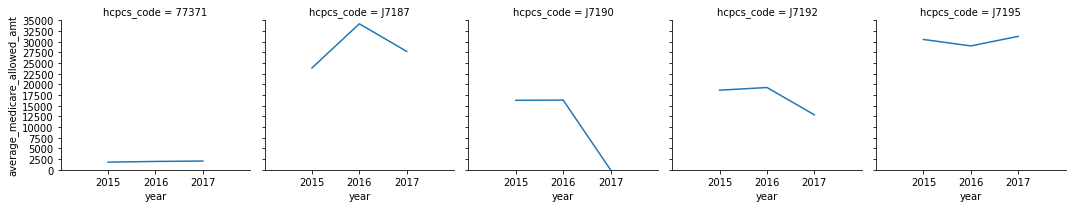

In [87]:
g = sns.FacetGrid(phys_medoo_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 35000), xticks=[2015, 2016, 2017], yticks=[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000])
g = g.map(plt.plot, "year", "average_medicare_allowed_amt")

In [88]:
print(phys_med_of_top5)

    hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15  \
220      28730     6780.870000     3329.220000     2507.134286   
233      29825     1624.120000     1815.060000     3147.276410   
282      33264    24362.086026    26318.603125    28020.960000   
485      64575     9495.304583     4330.190000     4135.850000   
632      69930    30720.781782    29795.304200    27903.864054   

     16/17_med_chng  15/16_med_chng  15/17_med_chng  
220     3451.650000      822.085714     4273.735714  
233      190.940000     1332.216410     1523.156410  
282     1956.517100     1702.356875     3658.873974  
485     5165.114583      194.340000     5359.454583  
632      925.477582     1891.440146     2816.917729  


In [89]:
phys_17_medof_top5 = phys_17_group[phys_17_group["hcpcs_code"].isin(['28730', '29825', '33264', '64575', '69930'])]
phys_17_medof_top5 = phys_17_medof_top5.reset_index()
phys_17_medof_top5['year'] = 2017
phys_17_medof_top5 = phys_17_medof_top5.drop(columns={'srvc_cnt_17', 'index'})
phys_17_medof_top5 = phys_17_medof_top5.rename(columns={'avg_med_amt_17' : 'average_medicare_allowed_amt'})
print(phys_17_medof_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      28730                    725.425583  2017
1      29825                    252.134648  2017
2      33264                    947.956661  2017
3      64575                   3316.283491  2017
4      69930                   2987.475095  2017


In [90]:
phys_16_medof_top5 = phys_16_group[phys_16_group["hcpcs_code"].isin(['28730', '29825', '33264', '64575', '69930'])]
phys_16_medof_top5 = phys_16_medof_top5.reset_index()
phys_16_medof_top5['year'] = 2016
phys_16_medof_top5 = phys_16_medof_top5.drop(columns={'srvc_cnt_16', 'index'})
phys_16_medof_top5 = phys_16_medof_top5.rename(columns={'avg_med_amt_16' : 'average_medicare_allowed_amt'})
print(phys_16_medof_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      28730                    671.270684  2016
1      29825                    268.106221  2016
2      33264                    834.299731  2016
3      64575                    880.036299  2016
4      69930                   3268.645347  2016


In [91]:
phys_15_medof_top5 = phys_15_group[phys_15_group["hcpcs_code"].isin(['28730', '29825', '33264', '64575', '69930'])]
phys_15_medof_top5 = phys_15_medof_top5.reset_index()
phys_15_medof_top5['year'] = 2015
phys_15_medof_top5 = phys_15_medof_top5.drop(columns={'srvc_cnt_15', 'index'})
phys_15_medof_top5 = phys_15_medof_top5.rename(columns={'avg_med_amt_15' : 'average_medicare_allowed_amt'})
print(phys_15_medof_top5)

  hcpcs_code  average_medicare_allowed_amt  year
0      28730                    635.693244  2015
1      29825                    301.399816  2015
2      33264                    822.247357  2015
3      64575                    848.669255  2015
4      69930                   2779.019062  2015


In [92]:
phys_medof_top5 = pd.concat([phys_17_medof_top5, phys_16_medof_top5, phys_15_medof_top5], ignore_index=True)
print(phys_medof_top5)

   hcpcs_code  average_medicare_allowed_amt  year
0       28730                    725.425583  2017
1       29825                    252.134648  2017
2       33264                    947.956661  2017
3       64575                   3316.283491  2017
4       69930                   2987.475095  2017
5       28730                    671.270684  2016
6       29825                    268.106221  2016
7       33264                    834.299731  2016
8       64575                    880.036299  2016
9       69930                   3268.645347  2016
10      28730                    635.693244  2015
11      29825                    301.399816  2015
12      33264                    822.247357  2015
13      64575                    848.669255  2015
14      69930                   2779.019062  2015


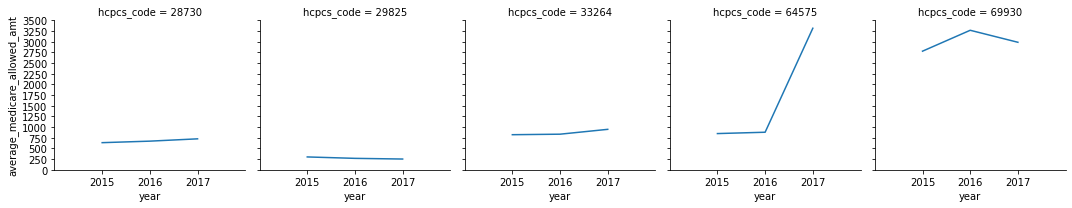

In [93]:
g = sns.FacetGrid(phys_medof_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 3500), xticks=[2015, 2016, 2017], yticks=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500])
g = g.map(plt.plot, "year", "average_medicare_allowed_amt")

phys_medio_top5.to_csv('phys_med_io.csv')
phys_medif_top5.to_csv('phys_med_if.csv')
phys_medoo_top5.to_csv('phys_med_oo.csv')
phys_medof_top5.to_csv('phys_med_of.csv')

In [94]:
print(phys_srvc_io_top5)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
2135      90670    1065891.0    1888401.0    3081734.0         822510.0   
2635      99213   91046163.0   95594961.0   92561066.0        4548798.0   
2636      99214   93946526.0   95071541.0   88251448.0        1125015.0   
2729      G0009    2070585.0    2774033.0    3831076.0         703448.0   
2803      G0439    5442886.0    4943145.0    4089078.0         499741.0   

      15/16_srvc_chng  15/17_srvc_chng  
2135        1193333.0        2015843.0  
2635        3033895.0        1514903.0  
2636        6820093.0        5695078.0  
2729        1057043.0        1760491.0  
2803         854067.0        1353808.0  


In [102]:
phys_17_srvc_group = phys_supp_17.groupby('hcpcs_code').sum()
phys_17_srvc_group = phys_17_srvc_group.reset_index()
print(phys_17_srvc_group)

     hcpcs_code  srvc_cnt_17  avg_med_amt_17
0         0008M        229.0    17216.800000
1         00100         65.0     1349.267352
2         00103      71814.0   367896.493568
3         00104     132520.0   233469.210848
4         00120       2466.0    21347.256790
...         ...          ...             ...
6043      Q9989         16.0       12.878341
6044      R0070     981876.0    61422.786412
6045      R0075     467984.0    18920.334264
6046      V2632         89.0      113.830000
6047      V2785       9009.0   839328.598506

[6048 rows x 3 columns]


In [103]:
phys_17_srvcio_top5 = phys_17_srvc_group[phys_17_srvc_group["hcpcs_code"].isin(['90670', '99213', '99214', 'G0009', 'G0439'])]
phys_17_srvcio_top5 = phys_17_srvcio_top5.reset_index()
phys_17_srvcio_top5['year'] = 2017
phys_17_srvcio_top5['srvc_cnt_mil'] = phys_17_srvcio_top5['srvc_cnt_17']/1000000
phys_17_srvcio_top5 = phys_17_srvcio_top5.drop(columns={'avg_med_amt_17', 'index', 'srvc_cnt_17'})
print(phys_17_srvcio_top5)

  hcpcs_code  year  srvc_cnt_mil
0      90670  2017      2.024985
1      99213  2017     96.476303
2      99214  2017    101.135852
3      G0009  2017      3.381640
4      G0439  2017      6.345749


In [104]:
phys_16_srvc_group = phys_supp_16.groupby('hcpcs_code').sum()
phys_16_srvc_group = phys_16_srvc_group.reset_index()
print(phys_16_srvc_group)

     hcpcs_code  srvc_cnt_16  avg_med_amt_16
0         0008M        197.0    10258.259329
1         00100         37.0      872.927825
2         00103      79941.0   410375.098923
3         00104     146661.0   251640.795949
4         0010M      13453.0      333.559722
...         ...          ...             ...
6017      Q9983        372.0    36855.942632
6018      R0070    1064578.0    71302.538438
6019      R0075     462093.0    20941.261282
6020      V2632         98.0      113.040000
6021      V2785       9326.0   947356.584602

[6022 rows x 3 columns]


In [105]:
phys_16_srvcio_top5 = phys_16_srvc_group[phys_16_srvc_group["hcpcs_code"].isin(['90670', '99213', '99214', 'G0009', 'G0439'])]
phys_16_srvcio_top5 = phys_16_srvcio_top5.reset_index()
phys_16_srvcio_top5['year'] = 2016
phys_16_srvcio_top5['srvc_cnt_mil'] = phys_16_srvcio_top5['srvc_cnt_16']/1000000
phys_16_srvcio_top5 = phys_16_srvcio_top5.drop(columns={'avg_med_amt_16', 'index', 'srvc_cnt_16'})
print(phys_16_srvcio_top5)

  hcpcs_code  year  srvc_cnt_mil
0      90670  2016      3.778629
1      99213  2016    112.302118
2      99214  2016    112.213273
3      G0009  2016      4.844952
4      G0439  2016      6.047432


In [106]:
phys_15_srvc_group = phys_supp_15.groupby('hcpcs_code').sum()
phys_15_srvc_group = phys_15_srvc_group.reset_index()
print(phys_15_srvc_group)

     hcpcs_code  srvc_cnt_15  avg_med_amt_15
0         00100         60.0     1066.331227
1         00102        130.0      475.994695
2         00103      77075.0   405125.220471
3         00104     148494.0   255799.426377
4         00120       2422.0    22380.313195
...         ...          ...             ...
5978      Q9979        332.0    10352.470661
5979      R0070    1109199.0    72810.800828
5980      R0075     484311.0    20569.550416
5981      V2632        103.0      113.490000
5982      V2785      10898.0   864829.864820

[5983 rows x 3 columns]


In [107]:
phys_15_srvcio_top5 = phys_15_srvc_group[phys_15_srvc_group["hcpcs_code"].isin(['90670', '99213', '99214', 'G0009', 'G0439'])]
phys_15_srvcio_top5 = phys_15_srvcio_top5.reset_index()
phys_15_srvcio_top5['year'] = 2015
phys_15_srvcio_top5['srvc_cnt_mil'] = phys_15_srvcio_top5['srvc_cnt_15']/1000000
phys_15_srvcio_top5 = phys_15_srvcio_top5.drop(columns={'avg_med_amt_15', 'index', 'srvc_cnt_15'})
print(phys_15_srvcio_top5)

  hcpcs_code  year  srvc_cnt_mil
0      90670  2015      5.655305
1      99213  2015    112.372468
2      99214  2015    107.330867
3      G0009  2015      6.260595
4      G0439  2015      4.858574


In [108]:
phys_srvcio_top5 = pd.concat([phys_17_srvcio_top5, phys_16_srvcio_top5, phys_15_srvcio_top5], ignore_index=True)
print(phys_srvcio_top5)

   hcpcs_code  year  srvc_cnt_mil
0       90670  2017      2.024985
1       99213  2017     96.476303
2       99214  2017    101.135852
3       G0009  2017      3.381640
4       G0439  2017      6.345749
5       90670  2016      3.778629
6       99213  2016    112.302118
7       99214  2016    112.213273
8       G0009  2016      4.844952
9       G0439  2016      6.047432
10      90670  2015      5.655305
11      99213  2015    112.372468
12      99214  2015    107.330867
13      G0009  2015      6.260595
14      G0439  2015      4.858574


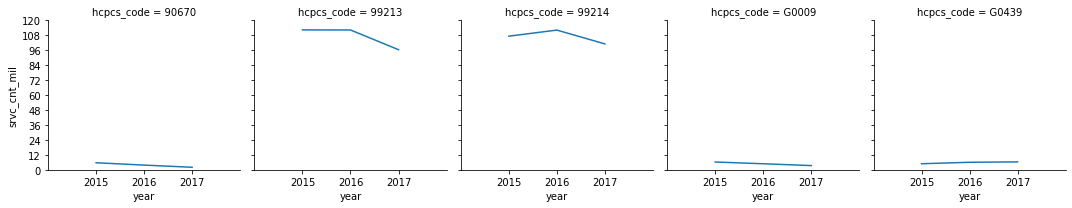

In [109]:
g = sns.FacetGrid(phys_srvcio_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 120), xticks=[2015, 2016, 2017], yticks=[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120])
g = g.map(plt.plot, "year", "srvc_cnt_mil")

In [110]:
print(phys_srvc_if_top5)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
2054      71010   15621331.0   16313024.0   16243571.0         691693.0   
2056      71020    8003711.0    8453529.0    8767182.0         449818.0   
2941      99223    9383693.0    9997169.0    9899220.0         613476.0   
2945      99231    5769872.0    6534493.0    6632663.0         764621.0   
2946      99232   42815070.0   45812633.0   45516102.0        2997563.0   

      15/16_srvc_chng  15/17_srvc_chng  
2054          69453.0         622240.0  
2056         313653.0         763471.0  
2941          97949.0         515527.0  
2945          98170.0         862791.0  
2946         296531.0        2701032.0  


In [111]:
phys_17_srvcif_top5 = phys_17_srvc_group[phys_17_srvc_group["hcpcs_code"].isin(['71010', '71020', '99223', '99231', '99232'])]
phys_17_srvcif_top5 = phys_17_srvcif_top5.reset_index()
phys_17_srvcif_top5['year'] = 2017
phys_17_srvcif_top5['srvc_cnt_mil'] = phys_17_srvcif_top5['srvc_cnt_17']/1000000
phys_17_srvcif_top5 = phys_17_srvcif_top5.drop(columns={'avg_med_amt_17', 'index', 'srvc_cnt_17'})
print(phys_17_srvcif_top5)

  hcpcs_code  year  srvc_cnt_mil
0      71010  2017     16.407982
1      71020  2017     12.082669
2      99223  2017     10.338909
3      99231  2017      6.907843
4      99232  2017     45.186732


In [112]:
phys_16_srvcif_top5 = phys_16_srvc_group[phys_16_srvc_group["hcpcs_code"].isin(['71010', '71020', '99223', '99231', '99232'])]
phys_16_srvcif_top5 = phys_16_srvcif_top5.reset_index()
phys_16_srvcif_top5['year'] = 2016
phys_16_srvcif_top5['srvc_cnt_mil'] = phys_16_srvcif_top5['srvc_cnt_16']/1000000
phys_16_srvcif_top5 = phys_16_srvcif_top5.drop(columns={'avg_med_amt_16', 'index', 'srvc_cnt_16'})
print(phys_16_srvcif_top5)

  hcpcs_code  year  srvc_cnt_mil
0      71010  2016     18.081072
1      71020  2016     13.469534
2      99223  2016     11.328227
3      99231  2016      8.245921
4      99232  2016     50.018533


In [113]:
phys_15_srvcif_top5 = phys_15_srvc_group[phys_15_srvc_group["hcpcs_code"].isin(['71010', '71020', '99223', '99231', '99232'])]
phys_15_srvcif_top5 = phys_15_srvcif_top5.reset_index()
phys_15_srvcif_top5['year'] = 2015
phys_15_srvcif_top5['srvc_cnt_mil'] = phys_15_srvcif_top5['srvc_cnt_15']/1000000
phys_15_srvcif_top5 = phys_15_srvcif_top5.drop(columns={'avg_med_amt_15', 'index', 'srvc_cnt_15'})
print(phys_15_srvcif_top5)

  hcpcs_code  year  srvc_cnt_mil
0      71010  2015     18.369140
1      71020  2015     13.735138
2      99223  2015     11.434881
3      99231  2015      8.824792
4      99232  2015     50.381203


In [114]:
phys_srvcif_top5 = pd.concat([phys_17_srvcif_top5, phys_16_srvcif_top5, phys_15_srvcif_top5], ignore_index=True)
print(phys_srvcif_top5)

   hcpcs_code  year  srvc_cnt_mil
0       71010  2017     16.407982
1       71020  2017     12.082669
2       99223  2017     10.338909
3       99231  2017      6.907843
4       99232  2017     45.186732
5       71010  2016     18.081072
6       71020  2016     13.469534
7       99223  2016     11.328227
8       99231  2016      8.245921
9       99232  2016     50.018533
10      71010  2015     18.369140
11      71020  2015     13.735138
12      99223  2015     11.434881
13      99231  2015      8.824792
14      99232  2015     50.381203


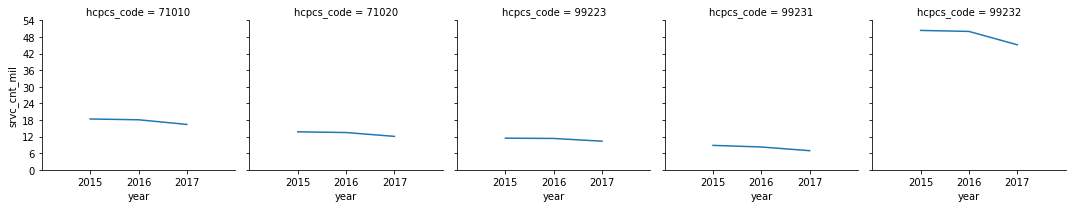

In [115]:
g = sns.FacetGrid(phys_srvcif_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 54), xticks=[2015, 2016, 2017], yticks=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54])
g = g.map(plt.plot, "year", "srvc_cnt_mil")

In [116]:
print(phys_srvc_oo_top5)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
291       80053   23506436.0   23564980.0   22661369.0          58544.0   
561       83036   10751257.0   10501332.0    9855267.0         249925.0   
731       85025   20295417.0   20247232.0   19369083.0          48185.0   
789       85610    5476487.0    6248387.0    6842974.0         771900.0   
1384      G0008    7548685.0    6743827.0    6657914.0         804858.0   

      15/16_srvc_chng  15/17_srvc_chng  
291          903611.0         845067.0  
561          646065.0         895990.0  
731          878149.0         926334.0  
789          594587.0        1366487.0  
1384          85913.0         890771.0  


In [117]:
phys_17_srvcoo_top5 = phys_17_srvc_group[phys_17_srvc_group["hcpcs_code"].isin(['80053', '83036', '85025', '85610', 'G0008'])]
phys_17_srvcoo_top5 = phys_17_srvcoo_top5.reset_index()
phys_17_srvcoo_top5['year'] = 2017
phys_17_srvcoo_top5['srvc_cnt_mil'] = phys_17_srvcoo_top5['srvc_cnt_17']/1000000
phys_17_srvcoo_top5 = phys_17_srvcoo_top5.drop(columns={'avg_med_amt_17', 'index', 'srvc_cnt_17'})
print(phys_17_srvcoo_top5)

  hcpcs_code  year  srvc_cnt_mil
0      80053  2017     28.827450
1      83036  2017     14.659924
2      85025  2017     29.676379
3      85610  2017     10.702525
4      G0008  2017     14.022139


In [118]:
phys_16_srvcoo_top5 = phys_16_srvc_group[phys_16_srvc_group["hcpcs_code"].isin(['80053', '83036', '85025', '85610', 'G0008'])]
phys_16_srvcoo_top5 = phys_16_srvcoo_top5.reset_index()
phys_16_srvcoo_top5['year'] = 2016
phys_16_srvcoo_top5['srvc_cnt_mil'] = phys_16_srvcoo_top5['srvc_cnt_16']/1000000
phys_16_srvcoo_top5 = phys_16_srvcoo_top5.drop(columns={'avg_med_amt_16', 'index', 'srvc_cnt_16'})
print(phys_16_srvcoo_top5)

  hcpcs_code  year  srvc_cnt_mil
0      80053  2016     32.972647
1      83036  2016     16.633001
2      85025  2016     34.225296
3      85610  2016     14.596628
4      G0008  2016     15.848625


In [119]:
phys_15_srvcoo_top5 = phys_15_srvc_group[phys_15_srvc_group["hcpcs_code"].isin(['80053', '83036', '85025', '85610', 'G0008'])]
phys_15_srvcoo_top5 = phys_15_srvcoo_top5.reset_index()
phys_15_srvcoo_top5['year'] = 2015
phys_15_srvcoo_top5['srvc_cnt_mil'] = phys_15_srvcoo_top5['srvc_cnt_15']/1000000
phys_15_srvcoo_top5 = phys_15_srvcoo_top5.drop(columns={'avg_med_amt_15', 'index', 'srvc_cnt_15'})
print(phys_15_srvcoo_top5)

  hcpcs_code  year  srvc_cnt_mil
0      80053  2015     32.248417
1      83036  2015     15.927256
2      85025  2015     33.923805
3      85610  2015     16.572815
4      G0008  2015     15.624311


In [120]:
phys_srvcoo_top5 = pd.concat([phys_17_srvcoo_top5, phys_16_srvcoo_top5, phys_15_srvcoo_top5], ignore_index=True)
print(phys_srvcoo_top5)

   hcpcs_code  year  srvc_cnt_mil
0       80053  2017     28.827450
1       83036  2017     14.659924
2       85025  2017     29.676379
3       85610  2017     10.702525
4       G0008  2017     14.022139
5       80053  2016     32.972647
6       83036  2016     16.633001
7       85025  2016     34.225296
8       85610  2016     14.596628
9       G0008  2016     15.848625
10      80053  2015     32.248417
11      83036  2015     15.927256
12      85025  2015     33.923805
13      85610  2015     16.572815
14      G0008  2015     15.624311


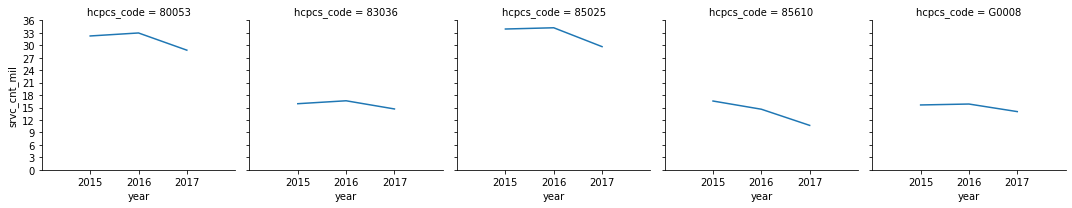

In [121]:
g = sns.FacetGrid(phys_srvcoo_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 36), xticks=[2015, 2016, 2017], yticks=[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36])
g = g.map(plt.plot, "year", "srvc_cnt_mil")

In [122]:
print(phys_srvc_of_top5)

    hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15  16/17_srvc_chng  \
836      85610      30861.0      94170.0     144353.0          63309.0   
948      A0427    5602953.0    5573065.0    5519115.0          29888.0   
949      A0428    4125995.0    4254642.0    4349497.0         128647.0   
977      G0471    3175479.0    3106023.0    2979164.0          69456.0   
989      P9603    1381163.0    1453607.0    1466905.0          72444.0   

     15/16_srvc_chng  15/17_srvc_chng  
836          50183.0         113492.0  
948          53950.0          83838.0  
949          94855.0         223502.0  
977         126859.0         196315.0  
989          13298.0          85742.0  


In [123]:
phys_17_srvcof_top5 = phys_17_srvc_group[phys_17_srvc_group["hcpcs_code"].isin(['85610', 'A0427', 'A0428', 'G0471', 'P9603'])]
phys_17_srvcof_top5 = phys_17_srvcof_top5.reset_index()
phys_17_srvcof_top5['year'] = 2017
phys_17_srvcof_top5['srvc_cnt_mil'] = phys_17_srvcof_top5['srvc_cnt_17']/1000000
phys_17_srvcof_top5 = phys_17_srvcof_top5.drop(columns={'avg_med_amt_17', 'index', 'srvc_cnt_17'})
print(phys_17_srvcof_top5)

  hcpcs_code  year  srvc_cnt_mil
0      85610  2017     10.702525
1      A0427  2017      5.018635
2      A0428  2017      3.916084
3      G0471  2017      3.634055
4      P9603  2017      3.565691


In [124]:
phys_16_srvcof_top5 = phys_16_srvc_group[phys_16_srvc_group["hcpcs_code"].isin(['85610', 'A0427', 'A0428', 'G0471', 'P9603'])]
phys_16_srvcof_top5 = phys_16_srvcof_top5.reset_index()
phys_16_srvcof_top5['year'] = 2016
phys_16_srvcof_top5['srvc_cnt_mil'] = phys_16_srvcof_top5['srvc_cnt_16']/1000000
phys_16_srvcof_top5 = phys_16_srvcof_top5.drop(columns={'avg_med_amt_16', 'index', 'srvc_cnt_16'})
print(phys_16_srvcof_top5)

  hcpcs_code  year  srvc_cnt_mil
0      85610  2016     14.596628
1      A0427  2016      5.679607
2      A0428  2016      4.453641
3      G0471  2016      4.559110
4      P9603  2016      4.663791


In [125]:
phys_15_srvcof_top5 = phys_15_srvc_group[phys_15_srvc_group["hcpcs_code"].isin(['85610', 'A0427', 'A0428', 'G0471', 'P9603'])]
phys_15_srvcof_top5 = phys_15_srvcof_top5.reset_index()
phys_15_srvcof_top5['year'] = 2015
phys_15_srvcof_top5['srvc_cnt_mil'] = phys_15_srvcof_top5['srvc_cnt_15']/1000000
phys_15_srvcof_top5 = phys_15_srvcof_top5.drop(columns={'avg_med_amt_15', 'index', 'srvc_cnt_15'})
print(phys_15_srvcof_top5)

  hcpcs_code  year  srvc_cnt_mil
0      85610  2015     16.572815
1      A0427  2015      5.662929
2      A0428  2015      4.780294
3      G0471  2015      4.549116
4      P9603  2015      4.835074


In [126]:
phys_srvcof_top5 = pd.concat([phys_17_srvcof_top5, phys_16_srvcof_top5, phys_15_srvcof_top5], ignore_index=True)
print(phys_srvcof_top5)

   hcpcs_code  year  srvc_cnt_mil
0       85610  2017     10.702525
1       A0427  2017      5.018635
2       A0428  2017      3.916084
3       G0471  2017      3.634055
4       P9603  2017      3.565691
5       85610  2016     14.596628
6       A0427  2016      5.679607
7       A0428  2016      4.453641
8       G0471  2016      4.559110
9       P9603  2016      4.663791
10      85610  2015     16.572815
11      A0427  2015      5.662929
12      A0428  2015      4.780294
13      G0471  2015      4.549116
14      P9603  2015      4.835074


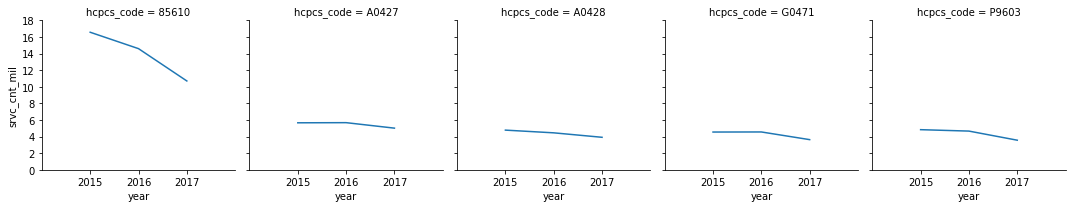

In [127]:
g = sns.FacetGrid(phys_srvcof_top5, col="hcpcs_code").set(xlim=(2014, 2018), ylim=(0, 18), xticks=[2015, 2016, 2017], yticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
g = g.map(plt.plot, "year", "srvc_cnt_mil")

phys_srvcio_top5.to_csv('phys_srvc_io.csv')
phys_srvcif_top5.to_csv('phys_srvc_if.csv')
phys_srvcoo_top5.to_csv('phys_srvc_oo.csv')
phys_srvcof_top5.to_csv('phys_srvc_of.csv')